## 6.5 Machine Learning Using K-means Clustering

### This script contains the following:

#### 1. Importing libraries and data
#### 2. The elbow technique
#### 3. k-means clustering

## 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
import scipy

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Data Analytics Immersion/Achievement 6/02 Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'toronto_cleaned.csv'))

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.shape

(15312, 43)

In [7]:
df.head()

,id,scrape_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,listings_count,listings_count_home,listings_count_p_rooms,listings_count_s_rooms,reviews_per_month
0,26654,20240214201029,113345,2010-04-25,100.000000,41.000000,0,1,Waterfront Communities-The Island,43.64608,-79.39032,Entire condo,Entire home/apt,4,1.0,1.0,2.0,"[""Building staff"", ""Microwave"", ""Central air c...",164.0,28,1125,1,0,0,0,115,2024-02-15,42,2,0,4.790000,4.790000,4.790000,4.640000,4.760000,4.860000,4.670000,f,5,5,0,0,0.260000
1,27423,20240214201029,118124,2010-05-04,100.000000,100.000000,0,1,South Riverdale,43.66884,-79.32725,Entire rental unit,Entire home/apt,1,1.0,0.0,1.0,"[""Free street parking"", ""Microwave"", ""Central ...",75.0,90,365,1,10,13,13,146,2024-02-15,28,1,0,4.930000,5.000000,4.850000,5.000000,5.000000,4.850000,4.850000,f,1,1,0,0,0.170000
2,335446,20240214201029,1704172,2012-02-05,100.000000,100.000000,1,1,Moss Park,43.65744,-79.37228,Private room in condo,Private room,1,1.0,1.0,1.0,"[""Microwave"", ""Central air conditioning"", ""Fre...",100.0,28,1125,1,0,0,2,277,2024-02-15,121,1,0,4.850000,4.720000,4.700000,4.970000,4.960000,4.530000,4.780000,t,2,1,1,0,0.830000
3,339418,20240214201029,1027776,2011-08-27,95.848253,85.081771,0,1,Mount Pleasant West,43.69954,-79.39330,Private room in rental unit,Private room,2,1.0,1.0,0.0,"[""Free street parking"", ""Microwave"", ""Shared s...",60.0,28,90,1,0,0,0,0,2024-02-15,85,0,0,4.500000,4.330000,4.110000,4.590000,4.670000,4.650000,4.360000,f,1,0,1,0,0.580000
4,42892,20240214201029,187320,2010-08-01,100.000000,44.000000,1,1,Waterfront Communities-The Island,43.64450,-79.38019,Entire condo,Entire home/apt,4,2.0,3.0,3.0,"[""Lake access"", ""Long term stays allowed"", ""Ho...",140.0,30,365,1,29,59,89,364,2024-02-15,0,0,0,4.788366,4.810071,4.810071,4.855948,4.867068,4.832452,4.688679,f,12,7,5,0,1.509953


## 02. Preprocessing Data befor Clustering

#### Removing Extreme Prices from the dataframe

In [8]:
# Removing extreme prices
df = df.loc[df['price'] <= 1500]

#### Checking for highly correlated variables to avoid inaccurate clusttering

In [9]:
df.columns

Index(['id', 'scrape_id', 'host_id', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'listings_count',
       'listings_count_home', 'listings_count_p_rooms',
       'listings_count_s_rooms', 'reviews_per_month'],
      dtype='object')

In [10]:
df[['host_response_rate','host_acceptance_rate','accommodates', 'bathrooms', 'bedrooms', 'beds','price', 'minimum_nights', 
    'maximum_nights','availability_30', 'availability_60','availability_90', 'availability_365','number_of_reviews', 
    'number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',
    'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value','listings_count',
    'listings_count_home', 'listings_count_p_rooms','listings_count_s_rooms', 'reviews_per_month'
   ]].corr()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,listings_count,listings_count_home,listings_count_p_rooms,listings_count_s_rooms,reviews_per_month
host_response_rate,1.000000,0.292986,0.035676,-0.000941,0.001898,0.026234,0.026524,-0.064668,-0.036360,-0.054596,-0.052570,-0.056465,-0.099137,0.067454,0.113605,0.089475,0.107499,0.108481,0.107860,0.091159,0.106534,0.065824,0.079902,-0.028891,0.010637,-0.064571,-0.085526,0.088445
host_acceptance_rate,0.292986,1.000000,0.071074,0.019563,0.015524,0.027343,0.052805,-0.240635,-0.061959,-0.103601,-0.094682,-0.093575,-0.151052,0.130360,0.240343,0.158932,0.032199,0.025943,0.036052,0.009611,0.022874,0.008908,0.016621,-0.239942,-0.264026,-0.020031,-0.017687,0.203187
accommodates,0.035676,0.071074,1.000000,0.578383,0.772080,0.790737,0.577302,-0.076060,-0.000725,0.031792,0.016492,0.008619,-0.002972,-0.009848,0.027454,-0.000417,0.016356,0.012060,0.022962,-0.008464,0.009641,0.056108,0.014588,-0.077846,0.039318,-0.215101,-0.067438,0.068126
bathrooms,-0.000941,0.019563,0.578383,1.000000,0.658471,0.523879,0.479802,-0.034032,-0.016509,0.040243,0.030091,0.025697,0.036843,-0.074716,-0.046643,-0.041885,0.023086,0.008175,0.016428,-0.000792,0.004054,0.027809,0.022501,-0.050059,-0.014900,-0.075415,0.006511,-0.033608
bedrooms,0.001898,0.015524,0.772080,0.658471,1.000000,0.745251,0.506474,-0.044311,-0.005636,0.039333,0.022336,0.016298,0.038059,-0.069816,-0.034189,-0.044824,0.022574,0.011022,0.026099,0.019117,0.016804,0.037576,0.023935,-0.078593,-0.009761,-0.135333,-0.038501,-0.023861
beds,0.026234,0.027343,0.790737,0.523879,0.745251,1.000000,0.465977,-0.036337,0.000794,0.008391,-0.005582,-0.009144,0.008511,-0.006611,0.013664,-0.029473,0.016122,0.009373,0.022078,0.002597,0.011455,0.037539,0.016060,-0.038605,0.045852,-0.152990,-0.029632,0.014045
price,0.026524,0.052805,0.577302,0.479802,0.506474,0.465977,1.000000,-0.075088,0.002823,0.098853,0.073621,0.061831,0.034864,-0.024566,0.021891,-0.029692,0.068430,0.059066,0.064017,0.017948,0.048204,0.108920,0.045655,-0.093441,0.025911,-0.222483,-0.071763,0.031543
minimum_nights,-0.064668,-0.240635,-0.076060,-0.034032,-0.044311,-0.036337,-0.075088,1.000000,0.133386,0.080178,0.071107,0.071342,0.199827,-0.121799,-0.296741,-0.225816,-0.035738,-0.031352,-0.037761,-0.016413,-0.032106,-0.011855,-0.038865,0.242533,0.263278,0.027675,0.009413,-0.265110
maximum_nights,-0.036360,-0.061959,-0.000725,-0.016509,-0.005636,0.000794,0.002823,0.133386,1.000000,-0.018230,-0.025833,-0.026186,0.128717,0.089338,-0.054099,-0.071731,-0.034474,-0.025509,-0.050154,-0.024539,-0.023712,-0.000045,-0.021829,0.008563,0.022863,-0.021015,-0.011078,-0.115418
availability_30,-0.054596,-0.103601,0.031792,0.040243,0.039333,0.008391,0.098853,0.080178,-0.018230,1.000000,0.934290,0.861624,0.393483,-0.129954,-0.179472,-0.138247,-0.096971,-0.094922,-0.059541,-0.064361,-0.083362,-0.067749,-0.091664,0.081335,0.086343,0.009209,0.028094,-0.120581


#### Following variables have been identified which have strong correlation:

In [11]:
df[['accommodates','bedrooms', 'beds']].corr()

,accommodates,bedrooms,beds
accommodates,1.000000,0.772080,0.790737
bedrooms,0.772080,1.000000,0.745251
beds,0.790737,0.745251,1.000000


We will remove bedrooms and beds from the dataframe.

In [12]:
df[['availability_30','availability_60','availability_90']].corr()

,availability_30,availability_60,availability_90
availability_30,1.000000,0.934290,0.861624
availability_60,0.934290,1.000000,0.966533
availability_90,0.861624,0.966533,1.000000


We will remove availability_60 and availability_90.

In [13]:
df[['number_of_reviews_ltm','reviews_per_month']].corr()

,number_of_reviews_ltm,reviews_per_month
number_of_reviews_ltm,1.000000,0.732267
reviews_per_month,0.732267,1.000000


We will remove reviews_per_month from the dataframe.

In [14]:
df[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_value']].corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value
review_scores_rating,1.000000,0.845164,0.772967,0.704729,0.788120,0.817466
review_scores_accuracy,0.845164,1.000000,0.730426,0.647071,0.734775,0.785747
review_scores_cleanliness,0.772967,0.730426,1.000000,0.575103,0.627276,0.701098
review_scores_checkin,0.704729,0.647071,0.575103,1.000000,0.735201,0.619424
review_scores_communication,0.788120,0.734775,0.627276,0.735201,1.000000,0.690829
review_scores_value,0.817466,0.785747,0.701098,0.619424,0.690829,1.000000


We will remove review_scores_accuracy,review_scores_cleanliness, review_scores_checkin, review_scores_communication, and review_scores_value.

In [15]:
df[['listings_count','listings_count_home']].corr()

,listings_count,listings_count_home
listings_count,1.000000,0.861958
listings_count_home,0.861958,1.000000


We will remove listings_count_home from the dataframe.

#### Selecting only numerical variables and removing strongly correlated variables to create a subset

In [16]:
sub = df[['host_response_rate','host_acceptance_rate','accommodates', 'bathrooms',
           'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_365', 
          'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating', 
          'review_scores_location', 'listings_count','listings_count_p_rooms','listings_count_s_rooms']]

In [17]:
sub.head()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_location,listings_count,listings_count_p_rooms,listings_count_s_rooms
0,100.000000,41.000000,4,1.0,164.0,28,1125,0,115,42,2,0,4.790000,4.860000,5,0,0
1,100.000000,100.000000,1,1.0,75.0,90,365,10,146,28,1,0,4.930000,4.850000,1,0,0
2,100.000000,100.000000,1,1.0,100.0,28,1125,0,277,121,1,0,4.850000,4.530000,2,1,0
3,95.848253,85.081771,2,1.0,60.0,28,90,0,0,85,0,0,4.500000,4.650000,1,1,0
4,100.000000,44.000000,4,2.0,140.0,30,365,29,364,0,0,0,4.788366,4.832452,12,5,0


#### Standardizing dataset

We will use z-score to normalize the data so that extreme values do not get higher weight. This could be done manually by using mean and standard deviation. Here we have used scipy library.

In [18]:
sub = scipy.stats.zscore(sub[['host_response_rate','host_acceptance_rate', 'accommodates', 'bathrooms',
           'price', 'minimum_nights', 'maximum_nights','availability_30', 'availability_365', 
          'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating', 
          'review_scores_location', 'listings_count','listings_count_p_rooms','listings_count_s_rooms']])

### 2. The elbow technique

In [19]:
# Creating KMeans models for different clusters
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [20]:
#Creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 
score

[-258994.9999999999,
 -235291.8418077536,
 -216458.43060589515,
 -207892.8822703746,
 -192494.41366022875,
 -181034.60860058753,
 -166499.1393625207,
 -171008.83467039542,
 -154961.14608169836]

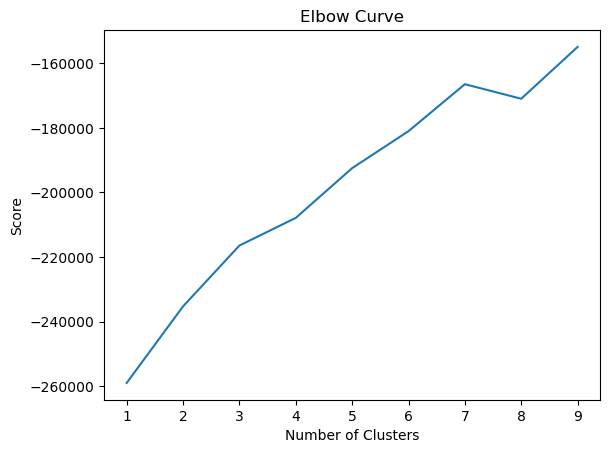

In [21]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this case we see that there the curve starts to flatten out at around 3 to 4 clusters. The graph shows a jump from 5 to 6 clusters but this will effect the interpretability of clusters if we select more clusters. I selected 4 clusters for the reason that the difference after 4 clusters isn't significant and justified to add more complexity in the interpretation.

### 3. k-means clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [23]:
# Fit the k-means object to the data.

kmeans.fit(sub)

KMeans(n_clusters=5)

In [24]:
sub['clusters'] = kmeans.fit_predict(sub)

In [25]:
sub.head()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_location,listings_count,listings_count_p_rooms,listings_count_s_rooms,clusters
0,0.310379,-1.925711,0.401472,-0.490557,0.044733,0.218536,1.745940,-1.317761,-0.618928,0.242979,-0.439245,-0.356563,0.004059,0.112334,-0.011301,-0.406248,-0.094644,3
1,0.310379,0.652292,-1.077234,-0.490557,-0.596866,2.530252,-0.183374,-0.497743,-0.356928,-0.000056,-0.503411,-0.356563,0.430979,0.071560,-0.395413,-0.406248,-0.094644,3
2,0.310379,0.652292,-1.077234,-0.490557,-0.416642,0.218536,1.745940,-1.317761,0.750235,1.614389,-0.503411,-0.356563,0.187025,-1.233179,-0.299385,-0.213648,-0.094644,3
3,-0.001040,0.000441,-0.584332,-0.490557,-0.705000,0.218536,-0.881481,-1.317761,-1.590865,0.989443,-0.567577,-0.356563,-0.880274,-0.743902,-0.395413,-0.213648,-0.094644,3
4,0.310379,-1.794626,0.401472,1.177851,-0.128283,0.293107,-0.183374,1.060291,1.485526,-0.486125,-0.567577,-0.356563,-0.000923,0.000011,0.660894,0.556750,-0.094644,3


In [26]:
sub['clusters'].value_counts()

clusters
3    9472
2    2241
1    2196
4    1249
0      77
Name: count, dtype: int64

In [27]:
# Adding clusters to main dataframe
df['clusters'] = sub['clusters']

In [28]:
# Verifying counts of clusters
df['clusters'].value_counts()

clusters
3    9472
2    2241
1    2196
4    1249
0      77
Name: count, dtype: int64

#### Listings count and price

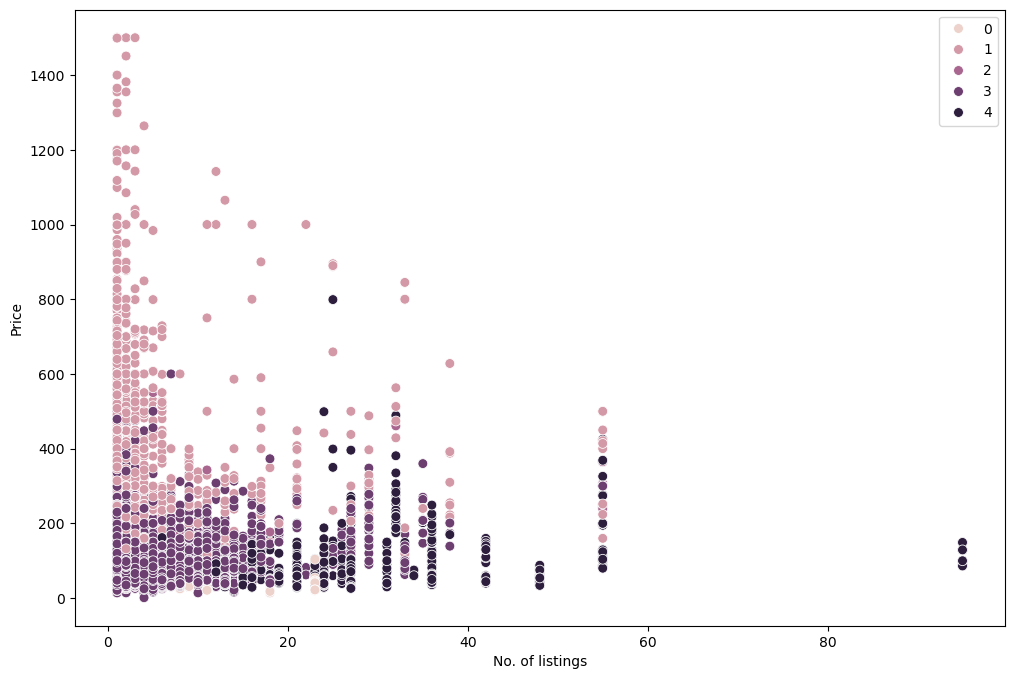

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['listings_count'], y=df['price'], hue=kmeans.labels_, s=50) 

ax.grid(False) 
plt.xlabel('No. of listings') 
plt.ylabel('Price') 
plt.show()

#### Observations:

We see that number of listings decreases as the price of listings increases. There are three clusters standing out in this plot.

* The purpled colour cluster(cluster 3) is mostly priced below $300 and listings less than 20, with only a few occasion with more than 20 listings.

* The light pink colored cluster(cluster 1) is the cluster with highest pricing for listings but these hosts have few listings.

* The black colored cluster(cluster 4) has many listings with more than 20 listings per host and most of the listings are priced less than $200.


#### Price and Review Scores Rating

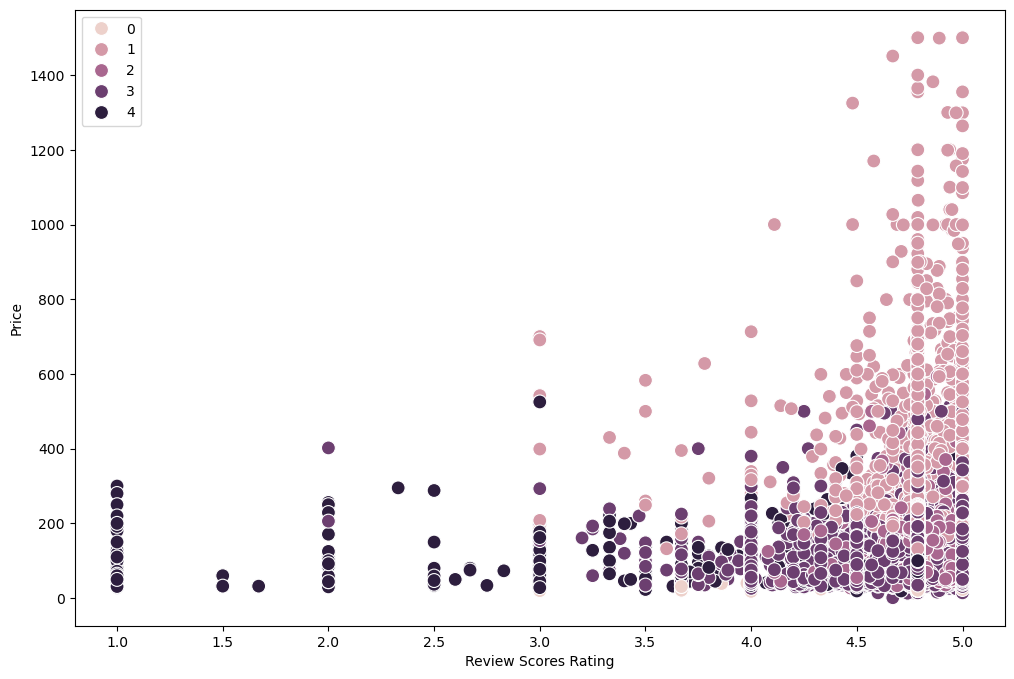

In [30]:
# Plot the clusters for the 'price' and 'review_scores_rating' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_scores_rating'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Review Scores Rating') 
plt.ylabel('Price') 
plt.show()

#### Observations:

* It can be seen that the light pink colored cluster(cluster 1) has got mostly high reviews and are priced more than $200. And, very highly priced listings have received only high reviews. This may indicate that these listings might offer high standard living experience and therefore the reviews are high.

* The black colored cluster(cluster 4) has got low reviews than other clusters and are priced around $200. This may indicate that the listings are charging money but doesn't deliver on experience front.

* The purple colored cluster(cluster 3) is mostly priced below $300 and has high reviews. Many listings have low prices and high reviews. These cluster must offer good value for money.


#### Number of Reviews and Listings Count

Text(0, 0.5, 'Listings Count')

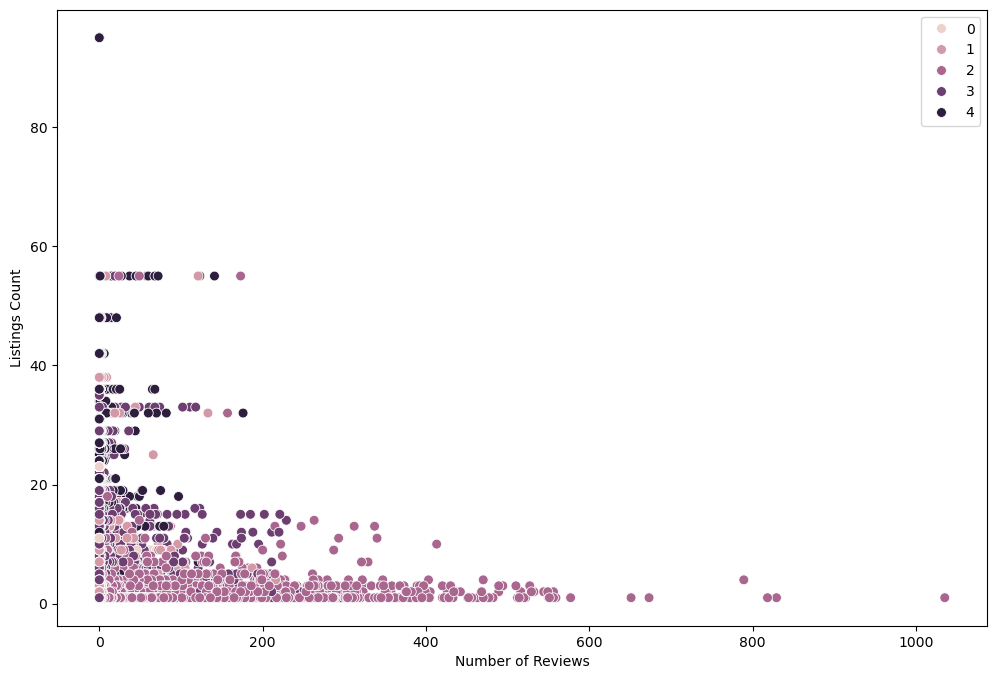

In [32]:
plt.figure(figsize= (12,8))
ax = sns.scatterplot(data = df, x = 'number_of_reviews', y = 'listings_count', hue=kmeans.labels_,s=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Listings Count')

The cluster with pink color (cluster 2) has got maximum reviews. These clusters also correspond to less number of listings by host.

#### Availability 30 and Price

Text(0, 0.5, 'Price')

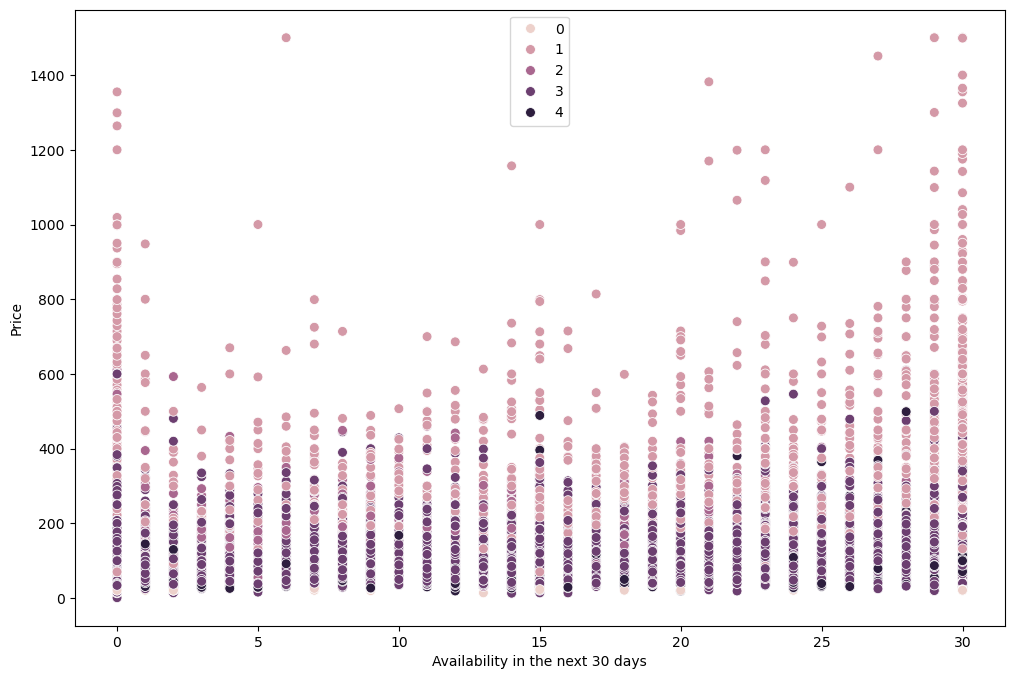

In [33]:
plt.figure(figsize= (12,8))
ax = sns.scatterplot(data = df, x = 'availability_30', y = 'price', hue=kmeans.labels_,s=50)
plt.xlabel('Availability in the next 30 days')
plt.ylabel('Price')

Light pink colored cluster(cluster 1) has listings with varying availability in the next 30 days. The highly priced listings are more split towards 0 and 30 with few listings between 0 and 30. Some of the highly priced listings are occupied regularly, while majority are not at all occupied in the next 30 days.

Text(0, 0.5, 'Price')

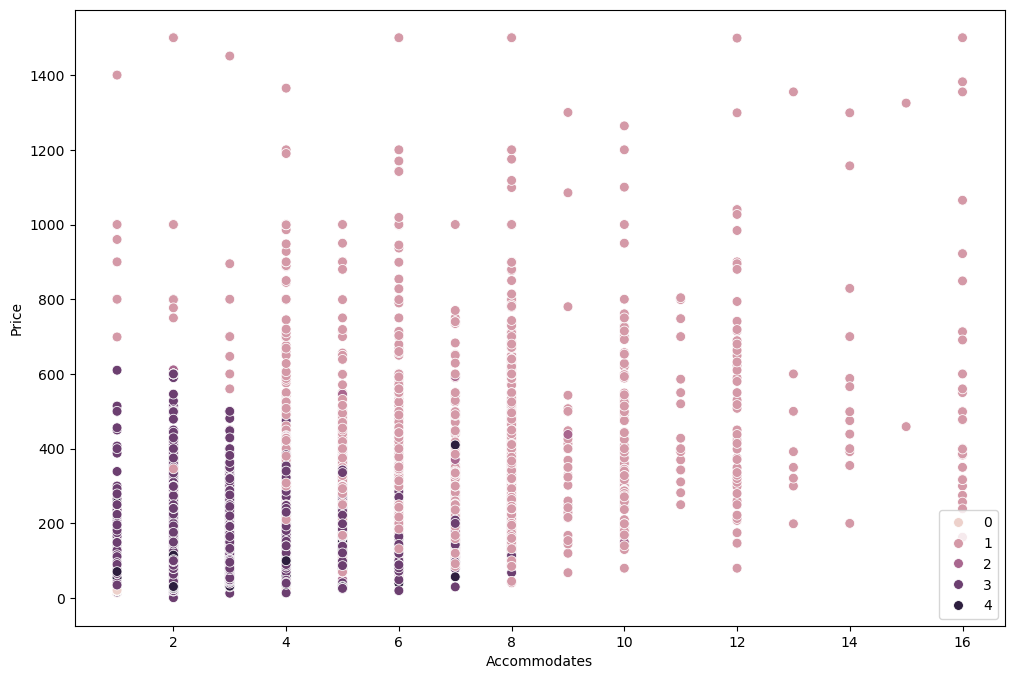

In [35]:
plt.figure(figsize= (12,8))
ax = sns.scatterplot(data = df, x = 'accommodates', y = 'price', hue=kmeans.labels_,s=50)
plt.xlabel('Accommodates')
plt.ylabel('Price')

The light pink colored cluster(cluster 1) accommodates more people than any other cluster. Also, they priced more than listings in other cluster. These listings must have big area.

In [236]:
# Adding clusters to original data frame
df['clusters'] = sub['clusters']

In [36]:
df.loc[df['clusters'] == 0, 'cluster'] = 'beige'
df.loc[df['clusters'] == 1, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 2, 'cluster'] = 'pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 4, 'cluster'] = 'black'

In [37]:
# Groupby clusters and looking at aggregations on various variables
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'availability_30':['mean', 'median'], 
                         'review_scores_rating':['mean', 'median'],
                          'listings_count':['mean', 'median'],
                          'number_of_reviews':['mean','median'],
                          'accommodates':['mean','median']})

price        availability_30        review_scores_rating  \
                  mean median            mean median                 mean   
cluster                                                                     
beige        34.116883   25.0       16.311688   16.0             4.683744   
black        96.373899   71.0       18.815052   26.0             4.449586   
light pink  368.963115  300.0       18.196721   23.0             4.826683   
pink        143.369478  125.0        9.610442    8.0             4.850531   
purple      121.354835  103.0       16.741132   19.0             4.810785   

                     listings_count        number_of_reviews         \
              median           mean median              mean median   
cluster                                                               
beige       4.788366      15.441558   18.0          6.389610    0.0   
black       4.788366      25.112890   21.0          6.482786    1.0   
light pink  4.830000       3.291894    1.0         17.296448    5.0   
pink        4.880000       1.911647    1.0         99.261044   59.0   
purple      4.790000       3.578970    2.0         16.639886    4.0   

           accommodates         
                   mean median  
cluster                         
beige          1.519481    1.0  
black          2.334668    2.0  
light pink     6.503643    6.0  
pink           3.007140    2.0  
purple         2.584143    2.0

#### Observations:
1. We see that there is a clear segmentation in terms of price. We can use clusters to classify prices in to very low priced, low priced, medium priced, high priced, and very high priced listings.
2. Note that low priced and very high priced clusters have high availability on average. High priced listings have the least availability out of all the clusters, 9 days on average. 
3. There isn't a clear difference in review_scores_rating between the four clusters indicating that most listings have recieved positive reviews. But out of all black cluster, which is low priced have received the least average review probably because of low reveiwed listings as seen in the above graph.
4. Note that for low priced listings the number of listings per host is more than other groups. On the other hand, the fewest average listing count per host is for high priced listings. 
5. Number of reviews is least for very low priced listings in comparison to listings in other clusters. 50% of the very low priced listings haven't got any reviews! The maximum number of reviews were recieved for high priced listings than all other listings.
6. Very high priced listings accommodates more people on average as expected. On the other hand very low priced listings accoommodates least number of people on average. 


#### Future steps:
1. Looking at the availability in the next 30 days and clusters, it is reasonable to expect that given a price of a listings we might be able to predict how many days in the next 30 days will it be available and consequently we might calculate revenue generated by a listing.
2. We can also use accommodation to predict the price of the listings. There isn't a strong functional linear relationship between the two variables. But looking at the clusters we can safely classify prices based on the number of people that can be accommodated in a listing.

## Exporting Files

In [38]:
df.to_csv(os.path.join(path, 'Prepared Data', 'toronto_clustered_clean.csv'))